# Chance of Admission

This program determines the chances of graduate admission given the GRE Score, TOEFL Score, University Rating, Statement of Purpose, Letter of Recommendation, CGPA and number of research.

__FEATURES__

__Serial No:__ Serial Number

__GRE Score:__ Graduate Record Examination

__TOEFL:__ Test of English as a Foreign Language

__University Rating:__ Rating of university from 1-5

__SOP:__ Statement of Purpose

__LOR:__ Letter of Recommendation

__CGPA:__ Undergraduate CGPA

__Research:__ Number of Research Carried out

__Chance of Admit:__ Chance of Admission


In [575]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Set the default style for plots
plt.style.use('dark_background')
colors = plt.rcParams["axes.prop_cycle"]


import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [576]:
#print(plt.style.available)

In [577]:
#Reading the csv file
data = pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [578]:
#Viewing data columns
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [579]:
#Produces a random sample from the data
data.sample(frac=.02)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
51,52,312,100,2,1.5,3.5,7.90,1,0.56
230,231,313,104,3,4.0,4.5,8.65,0,0.73
65,66,325,112,4,3.5,3.5,8.92,0,0.55
187,188,335,118,5,4.5,3.5,9.44,1,0.93
120,121,335,117,5,5.0,5.0,9.56,1,0.94
303,304,323,107,3,3.5,3.5,8.55,1,0.73
361,362,334,116,4,4.0,3.5,9.54,1,0.93
360,361,322,110,3,4.0,5.0,8.64,1,0.85


In [580]:
#Checking for unique values
data.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [581]:
#Dropping irrelevant column
data.drop(['Serial No.'], axis=1, inplace=True)

In [582]:
#shape of the dataset
print('\nShape of data :', data.shape)


Shape of data : (400, 8)


In [583]:
#Sorting values w.r.t a variable(GRE Column) in descending order
data.sort_values(by='GRE Score', ascending=False).head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,340,120,5,4.5,4.5,9.91,1,0.97
33,340,114,5,4.0,4.0,9.60,1,0.90
84,340,115,5,4.5,4.5,9.45,1,0.94
143,340,120,4,4.5,4.0,9.92,1,0.97
81,340,120,4,5.0,5.0,9.50,1,0.96
284,340,112,4,5.0,4.5,9.66,1,0.94
25,340,120,5,4.5,4.5,9.60,1,0.94
384,340,113,4,5.0,5.0,9.74,1,0.96
47,339,119,5,4.5,4.0,9.70,0,0.89
130,339,114,5,4.0,4.5,9.76,1,0.96


In [584]:
#Summary statistical description of dataset
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [585]:
#Checking for missing or NaN values
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [586]:
#Resolving duplicates in the dataset
data.duplicated().sum()
#data.drop_duplicates(keep='first')

0

In [587]:
#Checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [588]:
#Replace space in column names
#data.columns.str.replace(' ','')

Text(9.550000000000004, 0.5, 'counts')

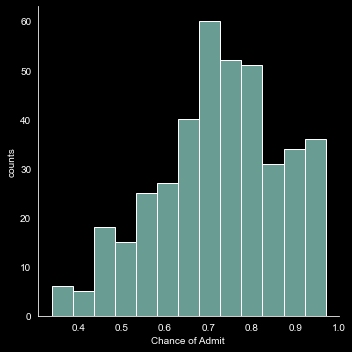

In [589]:
#Viewing the distribution of the data
sns.displot(data["Chance of Admit "])
plt.ylabel("counts")

In [590]:
#Rescaling the GRE Score into five ranges
pd.qcut(data['GRE Score'],5).value_counts()

(306.0, 314.0]      89
(289.999, 306.0]    82
(321.0, 327.0]      79
(314.0, 321.0]      79
(327.0, 340.0]      71
Name: GRE Score, dtype: int64

In [591]:
#This shows the GRE mean score within each of the five ranges of chance of admit
data['GRE Score'].groupby(pd.qcut(data['Chance of Admit '],5)).mean()

Chance of Admit 
(0.339, 0.61]    305.135802
(0.61, 0.7]      310.166667
(0.7, 0.764]     316.026667
(0.764, 0.86]    322.000000
(0.86, 0.97]     331.746667
Name: GRE Score, dtype: float64

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

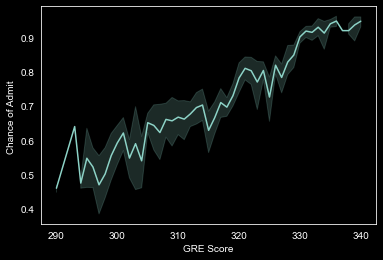

In [592]:
#Plotting GRE Score w.r.t. Chance of Admit
sns.lineplot(data=data, x="GRE Score", y="Chance of Admit ")

In [593]:
#Rescaling TOEFL Score into five scales 
pd.qcut(data['TOEFL Score'],5).value_counts()

(102.0, 106.0]     93
(91.999, 102.0]    90
(109.0, 113.0]     89
(113.0, 120.0]     68
(106.0, 109.0]     60
Name: TOEFL Score, dtype: int64

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

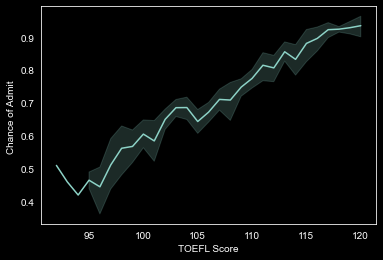

In [594]:
#Plotting TOEFL Score w.r.t. Chance of Admit
sns.lineplot(data=data, x="TOEFL Score", y="Chance of Admit ")

In [595]:
#This shows the TOEFL mean score within each of the five ranges of chance of admit
data['TOEFL Score'].groupby(pd.qcut(data['Chance of Admit '],5)).mean()

Chance of Admit 
(0.339, 0.61]    101.530864
(0.61, 0.7]      104.202381
(0.7, 0.764]     106.306667
(0.764, 0.86]    110.164706
(0.86, 0.97]     115.333333
Name: TOEFL Score, dtype: float64

In [596]:
#Counting the different values in the University Rating Column
data['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

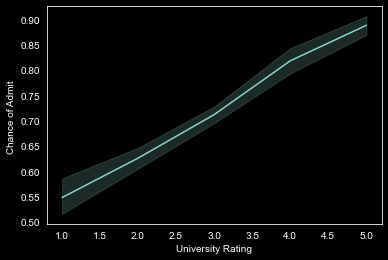

In [597]:
#Ploting University Rating w.r.t Chance of Admit
sns.lineplot(data=data, x="University Rating", y="Chance of Admit ")

In [598]:
#Value count for SOP
data['SOP'].value_counts()

3.5    70
4.0    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

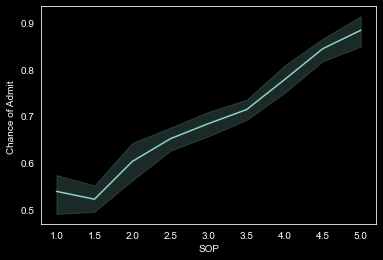

In [599]:
#Plotting SOP w.r.t Chance of Admit
sns.lineplot(data=data, x="SOP", y="Chance of Admit ")

In [600]:
#counting values in LOR
data['LOR '].value_counts()

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR , dtype: int64

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit '>

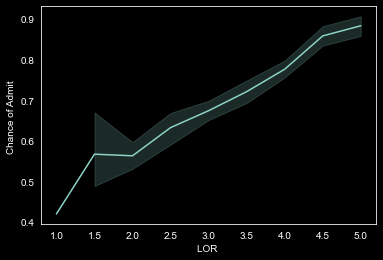

In [601]:
#Plotting LOR w.r.t Chance of Admit
sns.lineplot(data=data, x="LOR ", y="Chance of Admit ")

In [602]:
#Rescaling the value count of CGPA to fall between 5 ranges
pd.qcut(data['CGPA'],5).value_counts()

(8.446, 8.76]                 86
(6.7989999999999995, 8.07]    81
(9.13, 9.92]                  79
(8.07, 8.446]                 79
(8.76, 9.13]                  75
Name: CGPA, dtype: int64

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

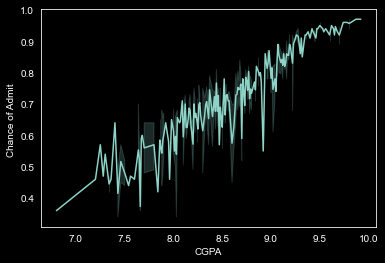

In [603]:
#Plotting CGPA w.r.t Chance of Admit
sns.lineplot(data=data, x="CGPA", y="Chance of Admit ")

In [604]:
#Value counts of values in Research
data['Research'].value_counts()

1    219
0    181
Name: Research, dtype: int64

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

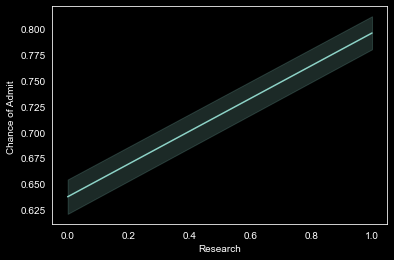

In [605]:
#Plotting Reseacrh w.r.t Chance of Admit
sns.lineplot(data=data, x="Research", y="Chance of Admit ")

In [606]:
#Applying 3d scatter plot to the variables GRE Score, TOEFL Score and Chance of Admit 
fig = px.scatter_3d(data, x='GRE Score', y='TOEFL Score', z="Chance of Admit ")
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

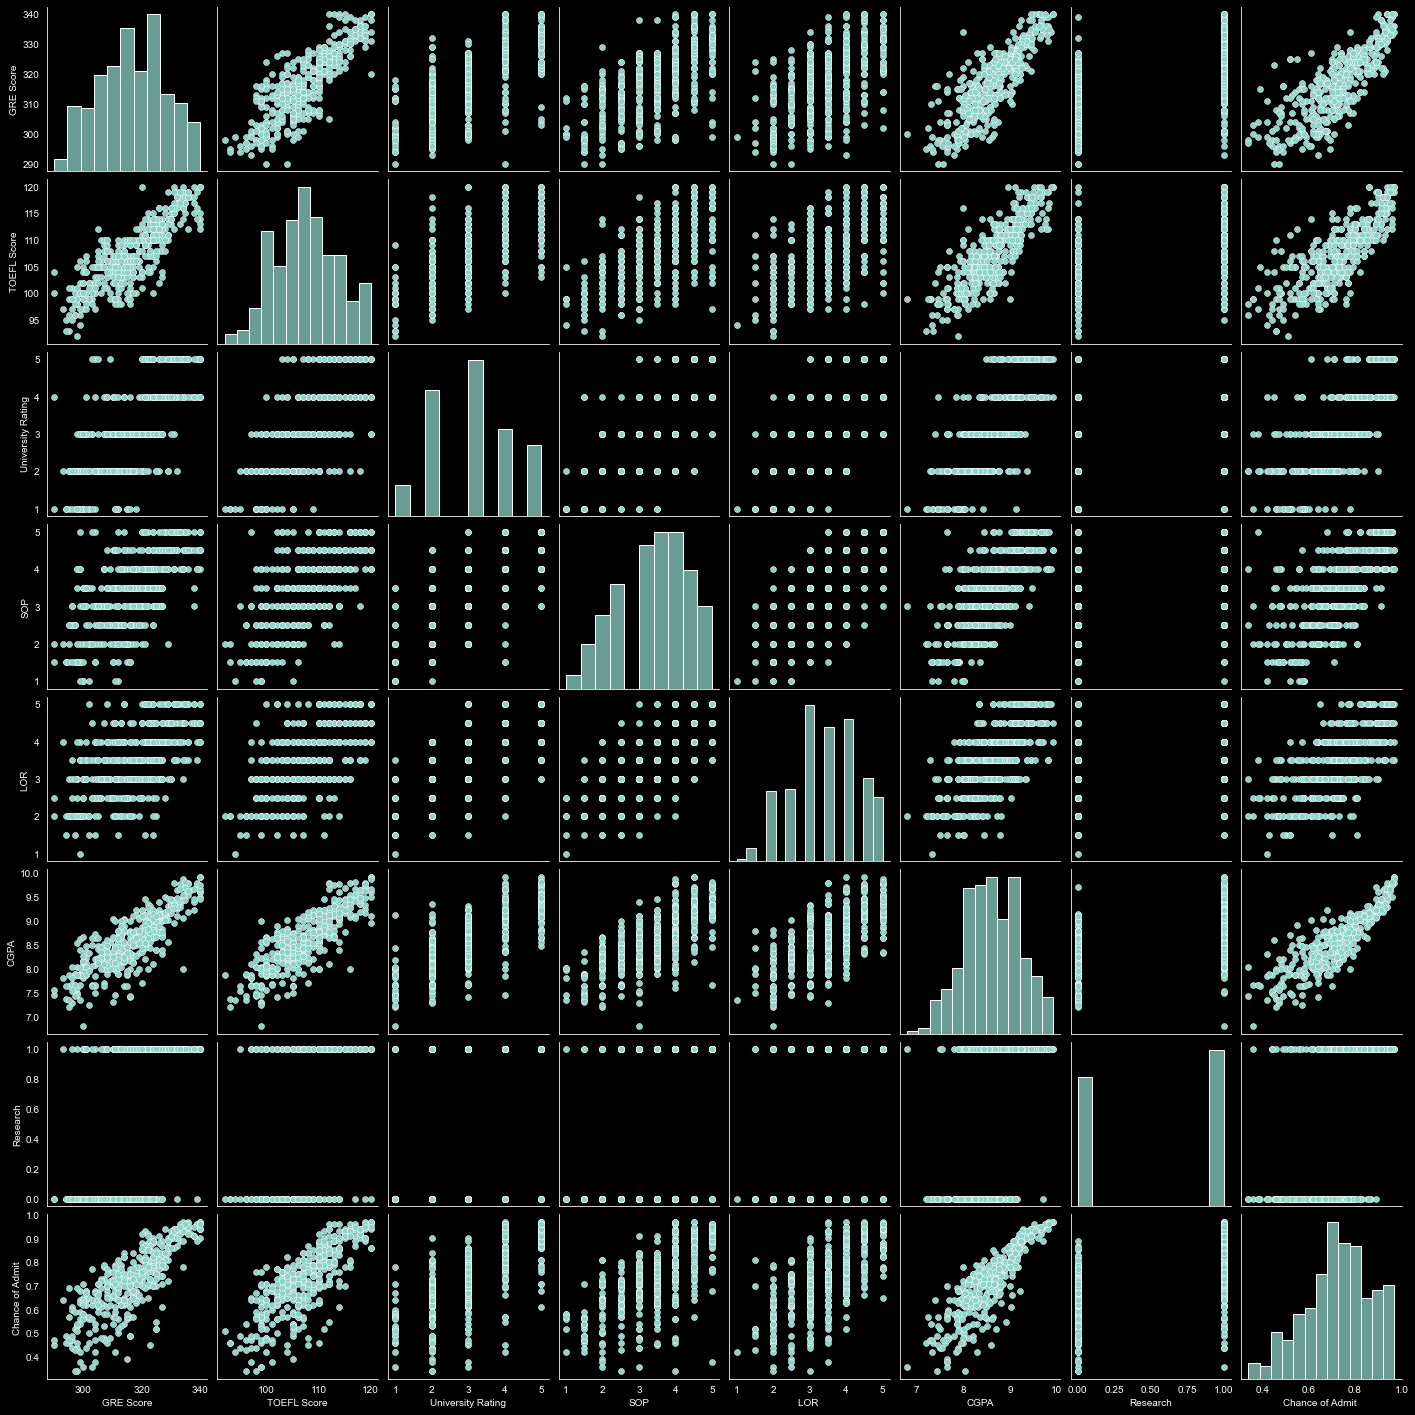

In [607]:
#Pairplot Visualisation
sns.pairplot(data)

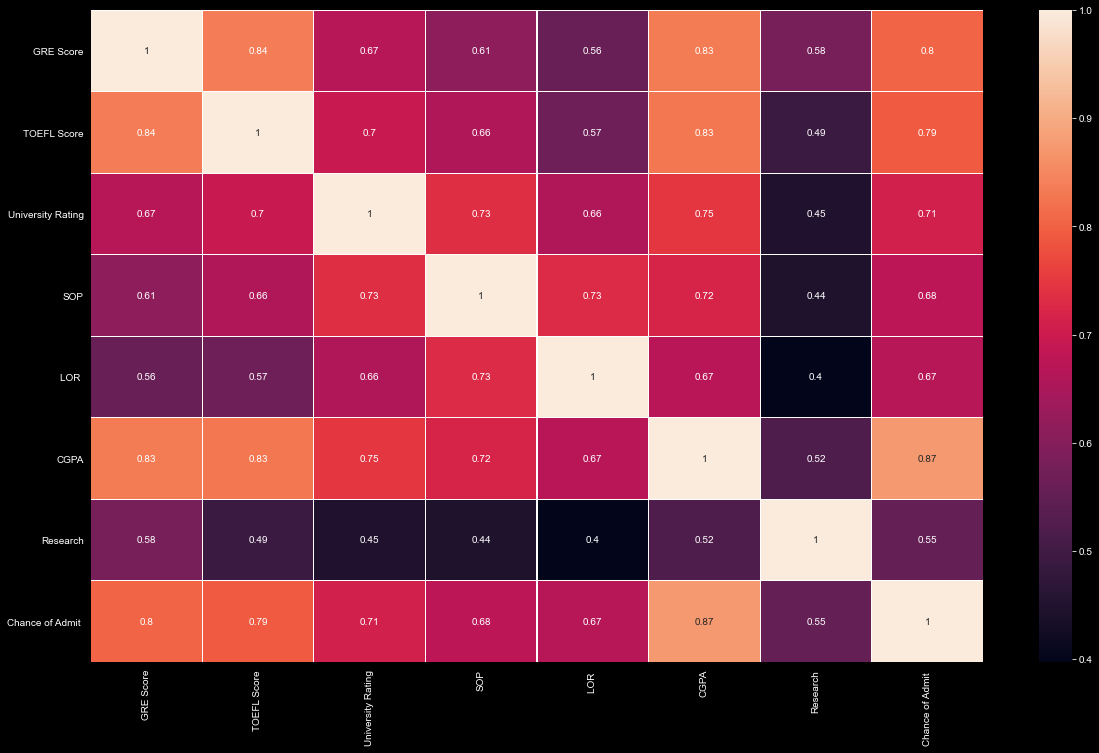

In [608]:
#checking the correlation between features
sns.heatmap(data.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# MACHINE LEARNING MODEL
Linear Regression

In [609]:
#Setting your columns into attributes and label
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y = data['Chance of Admit ']

In [610]:
#Importing the training and testing library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42, shuffle=True)

In [611]:
#Creating the object of the Linear Regression model
model = LinearRegression(normalize=True, n_jobs=-1)

#Fit the model with the training data
model.fit(X_train,y_train)

#Checking the accuracy of the train and test data
print("Score of the train set",model.score(X_train,y_train))
print("Score of the test set",model.score(X_test,y_test))

Score of the train set 0.8019807331500791
Score of the test set 0.7955991554684622


In [612]:
#Retrieving the coefficient of determination(indicates the goodness of fit)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8019807331500791


In [613]:
#Retrieving the intercept and slope of the regression
print('intercept:\n', model.intercept_)
print('slope:\n', model.coef_)

intercept:
 -1.284178056300175
slope:
 [0.00183981 0.00317072 0.00486626 0.00099469 0.0136946  0.11781823
 0.01843913]


In [614]:
#Retrieving the slope of the labels
coeff_df = pd.DataFrame({"Features":X_train.columns, "Coefficients":model.coef_})
coeff_df

,Features,Coefficients
0,GRE Score,0.001840
1,TOEFL Score,0.003171
2,University Rating,0.004866
3,SOP,0.000995
4,LOR,0.013695
5,CGPA,0.117818
6,Research,0.018439


# Prediction

In [615]:
#Predict the target on the training dataset
predict_y = model.predict(X_train) 

In [616]:
#To compare the actual output values for X_train with the predicted values, execute the following
df = pd.DataFrame({'Actual':y_train, 'Predicted': predict_y})
df

,Actual,Predicted
157,0.65,0.633216
109,0.68,0.703742
17,0.65,0.659465
347,0.42,0.448315
24,0.97,0.960613
...,...,...
71,0.96,0.955242
106,0.87,0.858647
270,0.72,0.651938
348,0.57,0.473773


In [617]:
#Predict the target on the testing dataset
predict_y = model.predict(X_test) 

In [618]:
#To compare the actual output values for X_test with the predicted values, execute the following
df = pd.DataFrame({'Actual':y_test, 'Predicted': predict_y})
df

,Actual,Predicted
209,0.68,0.647342
280,0.68,0.721659
33,0.90,0.935403
210,0.79,0.820790
93,0.44,0.577812
...,...,...
60,0.48,0.609524
79,0.46,0.452493
285,0.93,0.885128
305,0.74,0.773261


# Metrics

In [619]:
#Importing the metric library
from sklearn import metrics

#Checking the error percentage in the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_y)))

Mean Absolute Error: 0.04947838710419593
Mean Squared Error: 0.004652821846481292
Root Mean Squared Error: 0.0682115961291135


# Testing model on a new single set of input

In [620]:
new_input = {'GRE Score':320,'TOEFL Score':120,'University Rating':5,'SOP':4.5,'LOR':4.5,'CGPA':7.91,'Research':0}

In [636]:
def input_pred(input):
    new_input_df = pd.DataFrame([new_input])
    prediction = model.predict(new_input_df)[0]
    return new_input_df, prediction
input_pred(new_input)

(   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
 0        320          120                  5  4.5  4.5  7.91         0,
 0.7074234862414546)